In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import re
import time

In the above cell we are importing the libraries.
In the below cell we are extracting the url from the magic bricks website.

In [2]:
url="https://www.magicbricks.com/property-for-rent/residential-real-estate?&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,Service-Apartment,Residential-House,Villa,Commercial-Office-Space,Office-in-IT-Park/-SEZ,Commercial-Shop,Commercial-Showroom,Commercial-Land,Industrial-Land,Industrial-Building,Industrial-Shed&BudgetMax=10,000&cityName=New-Delhi&page=2&groupstart=30&offset=0&maxOffset=72&sortBy=premiumRecent&postedSince=-1&isNRI=N&multiLang=en&_gl=1*1ewmrrp*_gcl_au*NDcwNDYyMDMyLjE3MzE2OTgxMDI.*_ga*MTU0MjAxMjU1Mi4xNzMxNjk4MTAy*_ga_Y3D9LD1B01*MTczMTc1NTA5MC4zLjEuMTczMTc1NTE5OS4xMS4wLjA."


In [5]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36"
}



Now we are passing the request to scrap the data from their website.

In [7]:
page=requests.get(url,headers=headers)

The response 200 means our request was success,it allows us to scrap the data.

In [9]:
page

<Response [200]>

In [11]:
 page_content=page.text

'\n<!DOCTYPE html>\n<html lang="en-in">\n<head>\n<meta charset="UTF-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>\n</title>\n<link href="https://fonts.gstatic.com" rel="dns-prefetch">\n<link rel="preconnect" href="https://cdn.staticmb.com">\n<link rel="preconnect" href="https://img.staticmb.com">\n<link href="https://www.googletagmanager.com" rel="dns-prefetch">\n<link href="https://www.google-analytics.com" rel="dns-prefetch">\n<link rel="shortcut icon" href="https://cdn.staticmb.com/images/favicon.ico">\n<meta name="description" content="">\n<meta name="keywords" content="">\n<link rel="preload" as="image" href="https://img.staticmb.com/mbphoto/property/cropped_images/2025/Jan/30/Photo_h300_w450/77499257_3_1738241871438-0532_300_450.jpg" fetchpriority="high"/>\n<link rel="preload" as="image" href="https://img.staticmb.com/mbphoto/property/cropped_images/2024/Mar/14/Photo_h300_w450/718
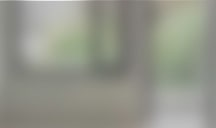
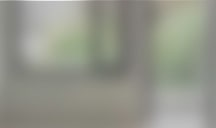

In [13]:
page_content

In page.content it returns the html content of the page.

In [15]:
soup=BeautifulSoup(page_content, 'html.parser')

In Beautisoup we're parsing the html content,it convert the html content into a structured format to extract the data easily.


<!DOCTYPE html>

<html lang="en-in">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>
</title>
<link href="https://fonts.gstatic.com" rel="dns-prefetch"/>
<link href="https://cdn.staticmb.com" rel="preconnect"/>
<link href="https://img.staticmb.com" rel="preconnect"/>
<link href="https://www.googletagmanager.com" rel="dns-prefetch"/>
<link href="https://www.google-analytics.com" rel="dns-prefetch"/>
<link href="https://cdn.staticmb.com/images/favicon.ico" rel="shortcut icon"/>
<meta content="" name="description"/>
<meta content="" name="keywords"/>
<link as="image" fetchpriority="high" href="https://img.staticmb.com/mbphoto/property/cropped_images/2025/Jan/30/Photo_h300_w450/77499257_3_1738241871438-0532_300_450.jpg" rel="preload">
<link as="image" href="https://img.staticmb.com/mbphoto/property/cropped_images/2024/Mar/14/Photo_h300_w450/71847739_2_hatsAppImage20
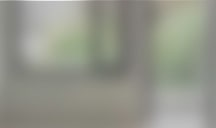
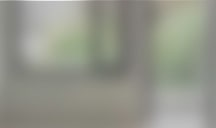

In [17]:
soup

Below script is designed to scrape rental property listings from Magicbricks. 
It collects details such as property title, furnishing status, agent details, operating time, security deposit, premium listing status, and society name.
The script loops through 50 pages to collect rental property listings from Magicbricks.
The URL is dynamically formatted with the page number (page={}).
Extracting the required data  from the html.
If a data field is missing, np.NaN is used to avoid errors and keep the dataset clean.
Extracted data is stored in separate lists, which can later be converted into a Pandas DataFrame for further analysis.

In [29]:
import requests
import numpy as np
from bs4 import BeautifulSoup

title = []
furnished = []
agent = []
operatingtime = []
securitydeposite = []
premium = []
society = []

request_header = {
    "Content-Type": "text/html;charset=UTF-8",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36",
    "Accept-Encoding": "gzip, deflate, br"
}

for i in range(1, 50):
    url = (
        "https://www.magicbricks.com/property-for-rent/residential-real-estate"
        "?&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,"
        "Service-Apartment,Residential-House,Villa,Commercial-Office-Space,Office-in-IT-Park/-SEZ,"
        "Commercial-Shop,Commercial-Showroom,Commercial-Land,Industrial-Land,Industrial-Building,"
        "Industrial-Shed&BudgetMax=10,000&cityName=New-Delhi&page={}"
        "&groupstart=30&offset=0&maxOffset=72&sortBy=premiumRecent&postedSince=-1&isNRI=N"
        "&multiLang=en&_gl=1*1ewmrrp*_gcl_au*NDcwNDYyMDMyLjE3MzE2OTgxMDI.*_ga*MTU0MjAxMjU1Mi4xNzMxNjk4MTAy"
        "*_ga_Y3D9LD1B01*MTczMTc1NTA5MC4zLjEuMTczMTc1NTE5OS4xMS4wLjA"
    ).format(i)

    response = requests.get(url, headers=request_header)

    soup = BeautifulSoup(response.text, "html.parser")

    for x in soup.find_all("div", class_="mb-srp__list"):
        title1 = x.find("h2", class_="mb-srp__card--title")
        furnished1 = x.find("div", class_="mb-srp__card__summary__list--item")
        agent1 = x.find("div", class_="mb-srp__card__ads--name")
        operatingtime1 = x.find("div", class_="mb-srp__card__ads--since")
        securitydeposite1 = x.find("div", class_="mb-srp__card__price--amount")
        premium1 = x.find("div", class_="mb-srp__card__memcatgry mb-srp__card__memcatgry--premium")
        society1 = x.find("div", class_="mb-srp__card__society--name")

        title.append(title1.text.strip() if title1 else np.NaN)
        furnished.append(furnished1.text.strip() if furnished1 else np.NaN)
        agent.append(agent1.text.strip() if agent1 else np.NaN)
        operatingtime.append(operatingtime1.text.strip() if operatingtime1 else np.NaN)
        securitydeposite.append(securitydeposite1.text.strip() if securitydeposite1 else np.NaN)
        premium.append(premium1.text.strip() if premium1 else np.NaN)
        society.append(society1.text.strip() if society1 else np.NaN)




Creating the data frame using the above data that is stored in the lists.

In [31]:
df=pd.DataFrame({'Title':title,'Furnishing_status':furnished,'Agent':agent,'OperatingTime':operatingtime,'SecurityDeposit':securitydeposite,'Premium':premium,'Area':society})

In [23]:
df

,Title,Furnishing_status,Agent,OperatingTime,SecurityDeposit,Premium,Area
0,1 BHK Builder Floor for Rent in NEB Valley Soc...,FurnishingSemi-Furnished,Agent: Nagpal Associates,Operating Since: 2005,"₹10,000",NaN,NaN
1,Studio Apartment for Rent in Project Amar Colo...,FurnishingSemi-Furnished,Agent: Bhalla Properties,Operating Since: 2000,"₹10,000",NaN,NaN
2,1 BHK Builder Floor for Rent in Saket New Delhi,FurnishingSemi-Furnished,Agent: S S Deswal,NaN,"₹10,000",NaN,NaN
3,1 BHK Builder Floor for Rent in Laxmi Nagar Ne...,FurnishingUnfurnished,Agent: Good Luck Properties,Operating Since: 2010,"₹9,500",NaN,NaN
4,Office Space for Rent in Sant Nagar East of Ka...,Bathroom1,Agent: Amit Property,Operating Since: 2000,"₹6,000",NaN,NaN
...,...,...,...,...,...,...,...
1465,1 BHK Apartment for Rent in Jaitpur Extension ...,FurnishingUnfurnished,Owner: Siya,NaN,"₹5,000",NaN,NaN
1466,1 BHK Apartment for Rent in Mohan Garden Razap...,FurnishingSemi-Furnished,Owner: kedar singh mahara,NaN,"₹5,500",NaN,NaN
1467,1 BHK Apartment for Rent in Vishnu Garden New ...,FurnishingFurnished,Owner: Smiley,NaN,"₹10,000",NaN,NaN
1468,Office Space for Rent in Bhajanpura New Delhi,Bathroom1,Owner: saif,NaN,"₹5,000",NaN,NaN


Storing the data into the csv file.

In [33]:
df.to_csv("MgB.csv",index=False)

Reading the data from the csv file.

In [27]:
df1=pd.read_csv("MgB.csv")

In [80]:
df1

,Title,Furnishing_status,Agent,OperatingTime,SecurityDeposit,Premium,Area
0,1 BHK Builder Floor for Rent in NEB Valley Soc...,FurnishingSemi-Furnished,Agent: Nagpal Associates,Operating Since: 2005,"₹10,000",NaN,NaN
1,Studio Apartment for Rent in Project Amar Colo...,FurnishingSemi-Furnished,Agent: Bhalla Properties,Operating Since: 2000,"₹10,000",NaN,NaN
2,1 BHK Builder Floor for Rent in Saket New Delhi,FurnishingSemi-Furnished,Agent: S S Deswal,NaN,"₹10,000",NaN,NaN
3,1 BHK Builder Floor for Rent in Laxmi Nagar Ne...,FurnishingUnfurnished,Agent: Good Luck Properties,Operating Since: 2010,"₹9,500",NaN,NaN
4,Office Space for Rent in Sant Nagar East of Ka...,Bathroom1,Agent: Amit Property,Operating Since: 2000,"₹6,000",NaN,NaN
...,...,...,...,...,...,...,...
1465,"1 BHK Builder Floor for Rent in Khanpur, Madan...",FurnishingUnfurnished,Owner: Suman,NaN,"₹8,000",NaN,NaN
1466,1 BHK House for Rent in Dwarka Mor New Delhi,FurnishingUnfurnished,Owner: Sarvesh Banwal,NaN,"₹5,000",NaN,NaN
1467,"1 BHK House for Rent in Sarita Vihar, Mathura ...",FurnishingSemi-Furnished,Owner: Ajay Thakur,NaN,"₹9,500",NaN,NaN
1468,1 BHK Builder Floor for Rent in Pandav Nagar N...,FurnishingUnfurnished,Owner: amrit,NaN,"₹8,200",NaN,NaN
